# data preprocessing 

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("thedevastator/books-sales-and-ratings")

print("Path to dataset files:", path)

/home/sebastian/miniconda3/envs/proy_miner/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 53.2k/53.2k [00:00<00:00, 7.75MB/s]

Extracting files...
Path to dataset files: /home/sebastian/.cache/kagglehub/datasets/thedevastator/books-sales-and-ratings/versions/2


In [3]:
import os
import pandas as pd

In [4]:
#dataset_path = "/Users/emilianosandoval/.cache/kagglehub/datasets/thedevastator/books-sales-and-ratings/versions/2"
dataset_path = path
# List files in the dataset directory
files = os.listdir(dataset_path)
print("Files in dataset directory:", files)

Files in dataset directory: ['Books_Data_Clean.csv']


In [5]:
# List all CSV files in the directory
csv_files = [file for file in os.listdir(dataset_path) if file.endswith(".csv")]

# Read each CSV file into a dictionary of DataFrames
dataframes = {file: pd.read_csv(os.path.join(dataset_path, file)) for file in csv_files}

# Print the keys (file names) to confirm
print("Loaded DataFrames:", dataframes.keys())

# cargar dataframe
df_books_clean = dataframes["Books_Data_Clean.csv"]

Loaded DataFrames: dict_keys(['Books_Data_Clean.csv'])


### Convertimos en valores numericos las variables categoricas

In [37]:
df_books_clean['genre'].unique()

array(['genre fiction', 'fiction', 'nonfiction', 'children'], dtype=object)

In [43]:
#Ahora, vamos a pasar los datos de genre a variosos valores numéricos
#Por cada 'genre fiction' y 'fiction' vamos a poner un 0, por cada 'nonfiction' vamos a poner un 1, por cada 'children' vamos a poner un 2
df_books_clean['genre'] = df_books_clean['genre'].replace({
    'genre fiction': 0,
    'fiction': 0,
    'nonfiction': 1,
    'children': 2
})
# Verificamos los cambios
print(df_books_clean['genre'].unique())

[0 1 2]


/tmp/ipykernel_73174/2981538286.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_books_clean['genre'] = df_books_clean['genre'].replace({


In [ ]:
df_books_clean['language_code'].unique()

array(['en-US', 'eng', nan, 'spa', 'en-GB', 'fre', 'en-CA', 'nl', 'ara'],
      dtype=object)

In [58]:
df_books_clean['language_code'].dropna(inplace=True)    
# Ahora, vamos a pasar los datos de language_code a variosos valores numéricos
#Le pondremos el valor de 5 a los nan
df_books_clean['language_code'] = df_books_clean['language_code'].replace({
    'eng': 0,
    'en-US': 0,
    'en-GB': 0,
    'en-CA': 0,
    'spa': 1,
    'fre': 2,
    'nl': 3,
    'ara': 4,
    })
df_books_clean['language_code'] = df_books_clean['language_code'].fillna(5)


In [64]:
df_books_clean['language_code'].unique()

array([0., 5., 1., 2., 3., 4.])

In [66]:
#contemos cuantos libros hay por cada lenguaje
language_counts = df_books_clean['language_code'].value_counts()
print("Language counts:\n", language_counts)

Language counts:
 language_code
0.0    1008
5.0      53
2.0       4
1.0       2
4.0       2
3.0       1
Name: count, dtype: int64


In [69]:
df_books_clean['Publisher '].unique()

array(['HarperCollins Publishers', 'Amazon Digital Services,  Inc.',
       'Hachette Book Group', 'Penguin Group (USA) LLC',
       'Random House LLC', 'Simon and Schuster Digital Sales Inc',
       'Macmillan', 'HarperCollins Publishing',
       'HarperCollins Christian Publishing'], dtype=object)

In [70]:
from sklearn.preprocessing import LabelEncoder

# Cuidado: hay un espacio al final en 'Publisher '
df_books_clean.rename(columns=lambda x: x.strip(), inplace=True)  # limpia espacios

le = LabelEncoder()
df_books_clean['publisher_code'] = le.fit_transform(df_books_clean['Publisher'])

# Opcional: ver el mapeo
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'Amazon Digital Services,  Inc.': np.int64(0), 'Hachette Book Group': np.int64(1), 'HarperCollins Christian Publishing': np.int64(2), 'HarperCollins Publishers': np.int64(3), 'HarperCollins Publishing': np.int64(4), 'Macmillan': np.int64(5), 'Penguin Group (USA) LLC': np.int64(6), 'Random House LLC': np.int64(7), 'Simon and Schuster Digital Sales Inc': np.int64(8)}


In [72]:
df_books_clean['publisher_code'].unique()

array([3, 0, 1, 6, 7, 8, 5, 4, 2])

In [76]:
#Ahora hagamos lo mismo con Author_Rating
le = LabelEncoder()
df_books_clean['author_rating'] = le.fit_transform(df_books_clean['Author_Rating'])

# Opcional: ver el mapeo
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)

{'Excellent': np.int64(0), 'Famous': np.int64(1), 'Intermediate': np.int64(2), 'Novice': np.int64(3)}


In [79]:
df_books_clean.columns

Index(['index', 'Publishing Year', 'Book Name', 'Author', 'language_code',
       'Author_Rating', 'Book_average_rating', 'Book_ratings_count', 'genre',
       'gross sales', 'publisher revenue', 'sale price', 'sales rank',
       'Publisher', 'units sold', 'publisher_code', 'author_rating'],
      dtype='object')

In [77]:
# Select only numeric columns
df_numeric = df_books_clean.select_dtypes(include=["number"])

In [ ]:
 
df_numeric = df_numeric.drop(columns=['index'])
df_numeric


,Publishing Year,language_code,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,units sold,publisher_code,author_rating
0,1975.0,0.0,3.42,155903,0,34160.00,20496.000,4.88,1,7000,3,3
1,1987.0,0.0,4.23,145267,0,12437.50,7462.500,1.99,2,6250,3,2
2,2015.0,0.0,3.31,138669,0,47795.00,28677.000,8.69,3,5500,0,3
3,2008.0,0.0,4.04,150898,0,41250.00,24750.000,7.50,3,5500,1,2
4,2011.0,0.0,4.04,198283,0,37952.50,22771.500,7.99,4,4750,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1065,2014.0,0.0,3.52,37379,1,104.94,62.964,0.99,1268,106,0,2
1066,1989.0,0.0,4.34,57312,0,846.94,508.164,7.99,1270,106,7,0
1067,1930.0,0.0,3.92,58742,0,846.94,508.164,7.99,1271,106,1,2
1068,2011.0,0.0,4.17,58028,0,104.94,62.964,0.99,1272,106,0,0


In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

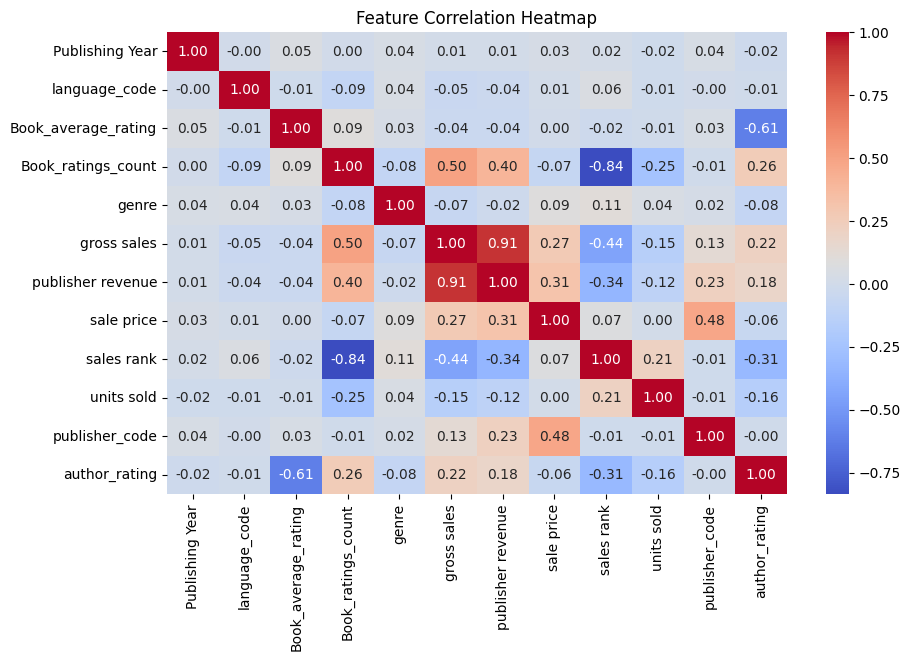

In [81]:
# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [48]:
correlation_matrix.Book_ratings_count

index                 -0.843338
Publishing Year        0.000290
Book_average_rating    0.093033
Book_ratings_count     1.000000
genre                 -0.083187
gross sales            0.502120
publisher revenue      0.401315
sale price            -0.068573
sales rank            -0.835446
units sold            -0.252232
Name: Book_ratings_count, dtype: float64

* gross sales: 0.50
* publisher revenue: 0.40
  * Esto sugiere que el rendimiento de las ventas influye en el recuento de valoraciones, lo cual tiene sentido, ya que cuantas más copias se vendan, más posibilidades habrá de recibir reseñas.
* sales rank: -0.83
* units sold: -0.25
  * Nos dice que mientras el rank sea bajo (mejor) tendra mayor reviews, esto es, el libro vende mas.
  * unidades vendidas es interesante porque que venda mas no implica--necesariamente--que tenga mas reviews. 
  * esta relacion no es lineal, por lo que es conveniente usar random forests como modelo

In [84]:
df_numeric.to_csv("book_cleaned.csv", index=False)

# Feature extraction

In [49]:
import pandas as pd
import numpy as np
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the book text
with open("libro.txt", "r", encoding="utf-8") as f:
    text = f.read()

# Clean and tokenize text
sentences = re.split(r'[.!?]+\s*', text.strip())
words = re.findall(r'\b\w+\b', text)

# Basic NLP features
word_count = len(words)
sentence_count = len(sentences)
avg_word_length = np.mean([len(w) for w in words if w.isalpha()])
avg_sentence_length = word_count / sentence_count if sentence_count else 0
lexical_diversity = len(set(words)) / word_count if word_count else 0
sentiment = TextBlob(text).sentiment.polarity

basic_features = pd.DataFrame([{
    'word_count': word_count,
    'sentence_count': sentence_count,
    'avg_word_length': avg_word_length,
    'avg_sentence_length': avg_sentence_length,
    'lexical_diversity': lexical_diversity,
    'sentiment_score': sentiment
}])

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=100)
tfidf_matrix = vectorizer.fit_transform([text])
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=[f"tfidf_{i+1}" for i in range(tfidf_matrix.shape[1])])

# Combine all features
juan_text_features = pd.concat([basic_features, tfidf_df], axis=1)

# Show output
juan_text_features.head()

,word_count,sentence_count,avg_word_length,avg_sentence_length,lexical_diversity,sentiment_score,tfidf_1,tfidf_2,tfidf_3,tfidf_4,...,tfidf_91,tfidf_92,tfidf_93,tfidf_94,tfidf_95,tfidf_96,tfidf_97,tfidf_98,tfidf_99,tfidf_100
0,31536,957,4.502994,32.952978,0.179319,0.054078,0.09043,0.030597,0.022438,0.017678,...,0.115927,0.011219,0.016658,0.011559,0.021078,0.022098,0.015638,0.015638,0.039436,0.020398


Explicacion de las features:
- `word_count`: total de palabras en el libro
- `sentence_count`: numeros de oraciones, divididas por signos como (.,!,?)
- `avg_word_length`: largo de las palabras promedio (caracteres)
- `avg_sentence_length`: promedio de palabras por oración
- `lexical_diversity`: radio de palabras unicas y el total
- `sentiment_score`: -1 es muy negativo y 1 muy positivo (0.05?)
Features de TF-IDF
- TF-IDF= Frecuencia del termino - frecuencia del documento inversa
  - si es alto significa que la palabra aparece mucho pero no frecuentemente en el lenguaje general, o sea es informativa. 

In [12]:
vectorizer.get_feature_names_out()

array(['al', 'algo', 'antes', 'así', 'aunque', 'cabeza', 'cada',
       'carmelita', 'como', 'con', 'contesta', 'cuando', 'cuenta', 'da',
       'de', 'decide', 'del', 'después', 'dice', 'donde', 'día', 'el',
       'en', 'encuentra', 'es', 'eso', 'esta', 'este', 'esto', 'está',
       'están', 'forma', 'frente', 'guadalupe', 'ha', 'hace', 'hacer',
       'hacia', 'hay', 'hombre', 'jefe', 'juan', 'la', 'las', 'le', 'lo',
       'los', 'lugar', 'lópez', 'me', 'mi', 'mismo', 'muy', 'más', 'nada',
       'no', 'nuestro', 'oficina', 'ojos', 'para', 'pero', 'piso', 'por',
       'pregunta', 'protagonista', 'puede', 'que', 'queda', 'qué',
       'responde', 'reyes', 'sabe', 'salazar', 'se', 'ser', 'si', 'sin',
       'solo', 'son', 'su', 'suricata', 'sus', 'tan', 'te', 'tiempo',
       'tiene', 'todo', 'trabajo', 'tras', 'un', 'una', 'unos', 'va',
       've', 'ver', 'vez', 'vida', 'voz', 'ya', 'él'], dtype=object)